In [3]:
import datajoint as dj
import numpy as np
#import tifffile as tf
import matplotlib.pyplot as plt
from imagesc import imagesc

import retinotopic_mapping 
import retinotopic_mapping.tools.FileTools as ft
import retinotopic_mapping.RetinotopicMapping as rm

In [4]:
dj.config['database.host'] = '139.91.171.210:3306'
dj.config['database.user'] = 'eflab'

In [5]:
# Access pipeline
map = dj.create_virtual_module('map.py', 'pipeline_map')

Please enter DataJoint password:  ········


Connecting eflab@139.91.171.210:3306


In [6]:
map.OptImageBar()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
9254,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9254,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,5,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9508,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9508,1,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9579,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875


In [10]:
ang = (map.OptImageBar() & 'animal_id=9254' & 'axis="horizontal"').fetch1('ang')

In [11]:
ang

array([[-2.6685069 , -3.0151389 ,  0.9955623 , ..., -2.7989697 ,
        -3.0872579 , -2.9286392 ],
       [-2.6685069 , -3.0151389 ,  0.9955623 , ..., -2.7989697 ,
        -3.0872579 , -2.9286392 ],
       [-3.0989377 ,  0.9855393 , -3.0071466 , ..., -2.5182922 ,
        -3.025325  , -2.7025304 ],
       ...,
       [-0.12806748, -0.5003157 ,  1.1367097 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.5528069 ,  1.9726993 ,  1.7677505 , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.3295326 ,  1.0161972 ,  2.8025413 , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

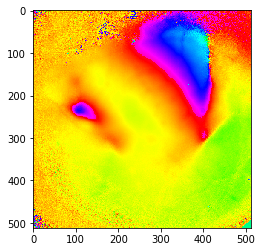

In [12]:
plt.plot()
plt.imshow(ang, cmap='gist_rainbow', interpolation='nearest')

In [14]:
positiveInput = (ang > 0)
positiveInput

array([[False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

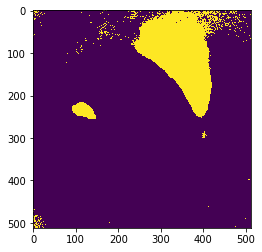

In [15]:
plt.plot()
plt.imshow(positiveInput, interpolation='nearest')

In [16]:
l = np.mod(ang, 2*np.pi)
l

array([[3.6146786, 3.2680466, 0.9955623, ..., 3.4842157, 3.1959276,
        3.3545463],
       [3.6146786, 3.2680466, 0.9955623, ..., 3.4842157, 3.1959276,
        3.3545463],
       [3.1842477, 0.9855393, 3.276039 , ..., 3.7648933, 3.2578604,
        3.580655 ],
       ...,
       [6.155118 , 5.78287  , 1.1367097, ..., 0.       , 0.       ,
        0.       ],
       [3.7303786, 1.9726993, 1.7677505, ..., 0.       , 0.       ,
        0.       ],
       [2.3295326, 1.0161972, 2.8025413, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

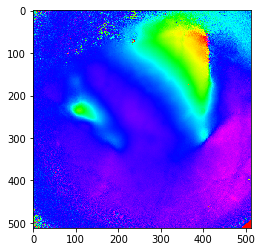

In [17]:
plt.plot()
plt.imshow(l, cmap='hsv', interpolation='nearest')

In [18]:
l[(l == 0) & positiveInput] = 2*np.pi
l

array([[3.6146786, 3.2680466, 0.9955623, ..., 3.4842157, 3.1959276,
        3.3545463],
       [3.6146786, 3.2680466, 0.9955623, ..., 3.4842157, 3.1959276,
        3.3545463],
       [3.1842477, 0.9855393, 3.276039 , ..., 3.7648933, 3.2578604,
        3.580655 ],
       ...,
       [6.155118 , 5.78287  , 1.1367097, ..., 0.       , 0.       ,
        0.       ],
       [3.7303786, 1.9726993, 1.7677505, ..., 0.       , 0.       ,
        0.       ],
       [2.3295326, 1.0161972, 2.8025413, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

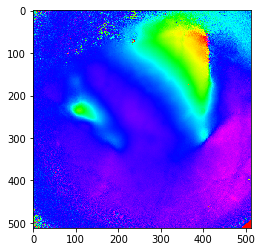

In [19]:
plt.plot()
plt.imshow(l, cmap='hsv', interpolation='nearest')

In [20]:
mn = np.percentile(l, 1)
mn

0.9692933678627014

In [21]:
mx = np.percentile(l, 99)
mx

5.134622974395752

In [22]:
l[l>mx]=mx
l

array([[3.6146786, 3.2680466, 0.9955623, ..., 3.4842157, 3.1959276,
        3.3545463],
       [3.6146786, 3.2680466, 0.9955623, ..., 3.4842157, 3.1959276,
        3.3545463],
       [3.1842477, 0.9855393, 3.276039 , ..., 3.7648933, 3.2578604,
        3.580655 ],
       ...,
       [5.134623 , 5.134623 , 1.1367097, ..., 0.       , 0.       ,
        0.       ],
       [3.7303786, 1.9726993, 1.7677505, ..., 0.       , 0.       ,
        0.       ],
       [2.3295326, 1.0161972, 2.8025413, ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

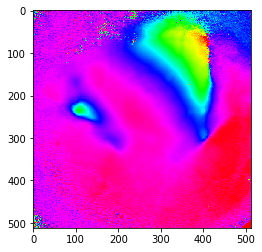

In [23]:
plt.plot()
plt.imshow(l, cmap='hsv', interpolation='nearest')

In [24]:
l[l<mn]=mn
l

array([[3.6146786 , 3.2680466 , 0.9955623 , ..., 3.4842157 , 3.1959276 ,
        3.3545463 ],
       [3.6146786 , 3.2680466 , 0.9955623 , ..., 3.4842157 , 3.1959276 ,
        3.3545463 ],
       [3.1842477 , 0.9855393 , 3.276039  , ..., 3.7648933 , 3.2578604 ,
        3.580655  ],
       ...,
       [5.134623  , 5.134623  , 1.1367097 , ..., 0.96929336, 0.96929336,
        0.96929336],
       [3.7303786 , 1.9726993 , 1.7677505 , ..., 0.96929336, 0.96929336,
        0.96929336],
       [2.3295326 , 1.0161972 , 2.8025413 , ..., 0.96929336, 0.96929336,
        0.96929336]], dtype=float32)

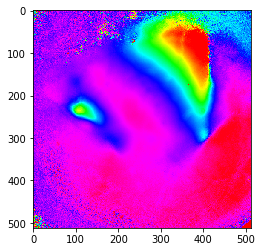

In [25]:
plt.plot()
plt.imshow(l, cmap='hsv', interpolation='nearest')

In [26]:
hor_l = l

Text(0.5, 1.0, 'ang_after')

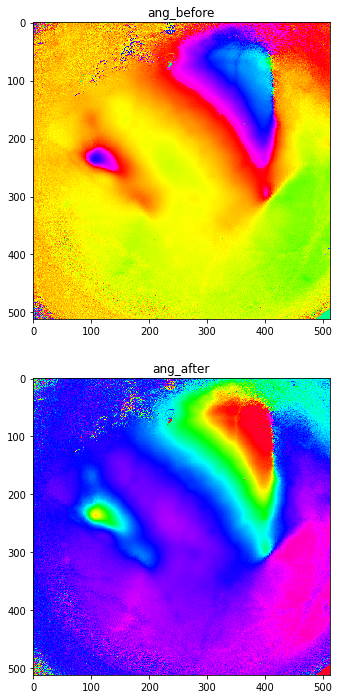

In [28]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(ang, cmap='gist_rainbow', interpolation='nearest')
plt.title('ang_before')

plt.subplot(212)
plt.imshow(hor_l, cmap='gist_rainbow', interpolation='nearest')
plt.title('ang_after')

In [31]:
vert_ang = (map.OptImageBar() & 'animal_id=9254' & 'axis="vertical"').fetch1('ang')
vpositiveInput = (vert_ang > 0)
vert_l = np.mod(vert_ang, 2*np.pi)
vert_l[(vert_l == 0) & vpositiveInput] = 2*np.pi
v_mn = np.percentile(vert_l, 1)
v_mx = np.percentile(vert_l, 99)
vert_l[vert_l>v_mx]=v_mx
vert_l[vert_l<v_mn]=v_mn

Text(0.5, 1.0, 'ang_after')

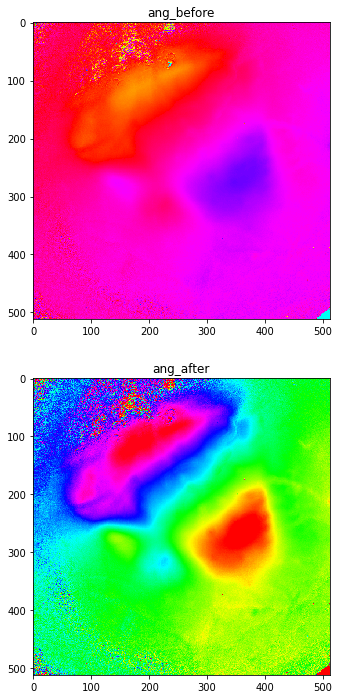

In [32]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(vert_ang, cmap='hsv', interpolation='nearest')
plt.title('ang_before')

plt.subplot(212)
plt.imshow(vert_l, cmap='hsv', interpolation='nearest')
plt.title('ang_after')

In [33]:
azi_amp, azi_ang, azi_vessels = (map.OptImageBar() & 'animal_id=9254' & 'axis="horizontal"').fetch1('amp', 'ang', 'vessels')
alt_amp, alt_ang, alt_vessels = (map.OptImageBar() & 'animal_id=9254' & 'axis="vertical"').fetch1('amp', 'ang', 'vessels')


In [34]:
params = {
          'phaseMapFilterSigma': 0.5,
          'signMapFilterSigma': 8.,
          'signMapThr': 0.4,
          'eccMapFilterSigma': 15.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [35]:
trial = rm.RetinotopicMappingTrial(altPosMap=vert_l,
                                   aziPosMap=hor_l,
                                   altPowerMap=alt_amp,
                                   aziPowerMap=azi_amp,
                                   vasculatureMap=azi_vessels,
                                   mouseID='9254',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

NameError: name 'rm' is not defined

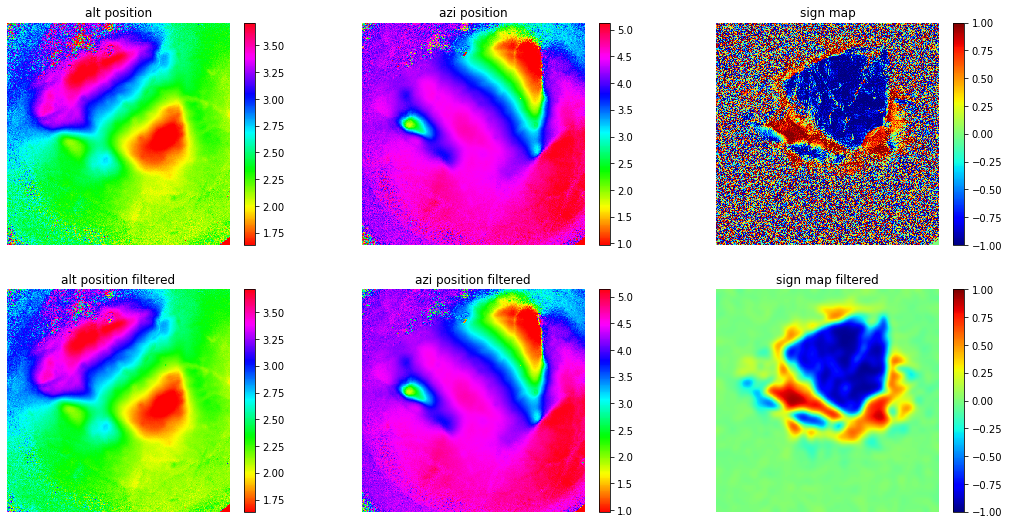

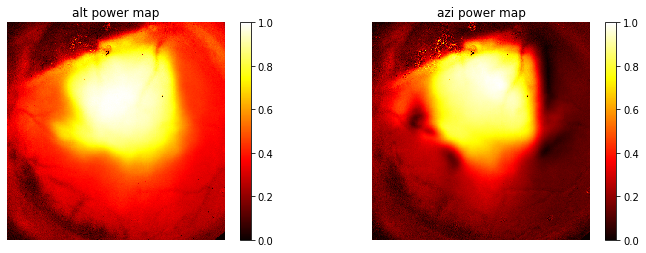

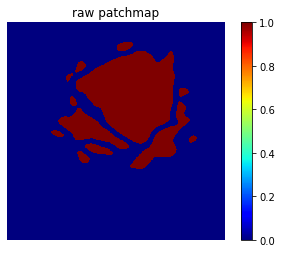

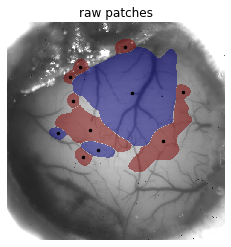

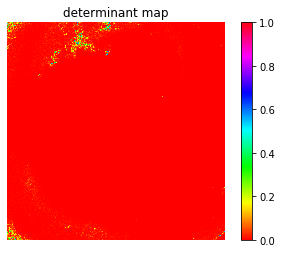

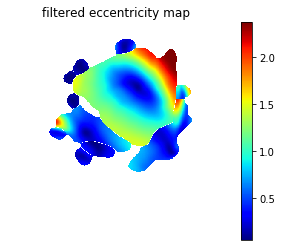

patch01AU=9.75 AS=7.179057 ratio=0.7363135509001904
patch02AU=3.5 AS=1.5900137 ratio=0.4542896406991141
patch03AU=4.5 AS=1.9956172 ratio=0.44347047805786133
patch04AU=1.5 AS=0.19438672 ratio=0.12959114710489908
patch05AU=1.75 AS=0.45777333 ratio=0.2615847587585449
patch06AU=1.5 AS=0.25454623 ratio=0.1696974833806356
patch07AU=0.5 AS=0.060970597 ratio=0.12194119393825531
patch08AU=1.75 AS=0.5633196 ratio=0.3218969276973179
patch09AU=1.5 AS=0.6817448 ratio=0.4544965426127116
patch10AU=0.5 AS=0.04973879 ratio=0.09947758167982101
patch11AU=0.5 AS=0.043933585 ratio=0.08786717057228088


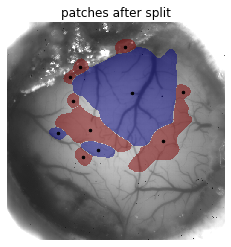

merge iteration: 1


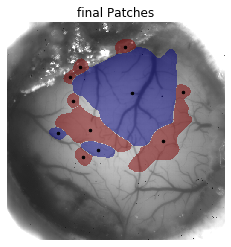

In [51]:
trial.processTrial(isPlot=True)